CARGA DE DATASET


In [8]:
import pandas as pd

# Leer las hojas
archivo = r'C:\Users\Asus\Documents\Maestría_Data_Science\Fundamentos\Taller_2\online_retail_II.xlsx'  
hoja1 = pd.read_excel(archivo, sheet_name="Year 2009-2010")
hoja2 = pd.read_excel(archivo, sheet_name="Year 2010-2011")

# Obtener las cabeceras
cabeceras_hoja1 = set(hoja1.columns)
cabeceras_hoja2 = set(hoja2.columns)

# Comparar las cabeceras
if cabeceras_hoja1 == cabeceras_hoja2:
    print("Ambas hojas tienen las mismas cabeceras. Puedes fusionarlas.")
else:
    print("Las cabeceras son diferentes. Aquí tienes los detalles:")
    print("Cabeceras únicas en Hoja1:", cabeceras_hoja1 - cabeceras_hoja2)
    print("Cabeceras únicas en Hoja2:", cabeceras_hoja2 - cabeceras_hoja1)


Ambas hojas tienen las mismas cabeceras. Puedes fusionarlas.


FUSION DE HOJAS

In [9]:
# Leer las hojas
archivo = r'C:\Users\Asus\Documents\Maestría_Data_Science\Fundamentos\Taller_2\online_retail_II.xlsx'  
hoja1 = pd.read_excel(archivo, sheet_name="Year 2009-2010")
hoja2 = pd.read_excel(archivo, sheet_name="Year 2010-2011")

# Fusionar las hojas
datos_combinados = pd.concat([hoja1, hoja2], ignore_index=True)

# Mostrar información de los datos fusionados
print(datos_combinados.head())
print(datos_combinados.info())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   

In [10]:
print(datos_combinados.columns)
#print(datos_combinados.describe())

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [11]:
# Revisa el tamaño del conjunto de datos
print(datos_combinados.shape)

# Explicación
num_filas, num_columnas = datos_combinados.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas.")

(1067371, 8)
El conjunto de datos tiene 1067371 filas y 8 columnas.


LIMPEZA DE DATOS

AL ELIMINAR LOS NULOS, LOS DUPLICADOS, LA INFORMACION INCOMPLETA O VALORES CANCELADOS SE TUVO EL RESULTADO DE:
(797885, 8)
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
Después de eliminar valores nulos: (797885, 8)
Después de eliminar duplicados: (797885, 8)
Después de filtrar transacciones irrelevantes: (779495, 8)

POR LO QUE LA LIMPIEZA DEBE REALIZARSE CON MAYOR CRITERIO

In [12]:
datos_combinados.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

El porcentaje de clientes nulos es: 22.77%

In [13]:
datos_combinados = datos_combinados.dropna(subset=["Description"])

In [14]:
print(datos_combinados.shape)

(1062989, 8)


In [15]:
datos_combinados["Customer ID"] = datos_combinados["Customer ID"].fillna("Unknown Customer")

In [16]:
datos_combinados.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [17]:
duplicados = datos_combinados.duplicated()
print(f"Total de duplicados: {duplicados.sum()}")

Total de duplicados: 34228


In [18]:
total_filas = datos_combinados.shape[0]
porcentaje_duplicados = (34228 / total_filas) * 100
print(f"Porcentaje de duplicados: {porcentaje_duplicados:.2f}%")

Porcentaje de duplicados: 3.22%


In [19]:
datos_combinados = datos_combinados.drop_duplicates(keep="first")

In [20]:
print(f"Total de filas después de eliminar duplicados: {datos_combinados.shape[0]}")

Total de filas después de eliminar duplicados: 1028761


In [21]:
productos_mas_vendidos = datos_combinados.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
print(productos_mas_vendidos.head(10))  # Mostrar los 10 más vendidos

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     104546
WHITE HANGING HEART T-LIGHT HOLDER     91026
ASSORTED COLOUR BIRD ORNAMENT          79579
JUMBO BAG RED RETROSPOT                76514
BROCADE RING PURSE                     69639
PACK OF 60 PINK PAISLEY CAKE CASES     55842
60 TEATIME FAIRY CAKE CASES            53678
SMALL POPCORN HOLDER                   48234
PACK OF 72 RETROSPOT CAKE CASES        47695
PACK OF 72 RETRO SPOT CAKE CASES       46079
Name: Quantity, dtype: int64


In [22]:
# Homologar un nombre mal escrito
datos_combinados.loc[datos_combinados['Description'] == "PACK OF 72 RETRO SPOT CAKE CASES", 'Description'] = "PACK OF 72 RETROSPOT CAKE CASES"

In [23]:
productos_mas_vendidos = datos_combinados.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
print(productos_mas_vendidos.head(10))  # Mostrar los 10 más vendidos

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     104546
PACK OF 72 RETROSPOT CAKE CASES        93774
WHITE HANGING HEART T-LIGHT HOLDER     91026
ASSORTED COLOUR BIRD ORNAMENT          79579
JUMBO BAG RED RETROSPOT                76514
BROCADE RING PURSE                     69639
PACK OF 60 PINK PAISLEY CAKE CASES     55842
60 TEATIME FAIRY CAKE CASES            53678
SMALL POPCORN HOLDER                   48234
ASSORTED COLOURS SILK FAN              43463
Name: Quantity, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\1028703090.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_productos, y="Description", x="TotalPrice", palette="magma")


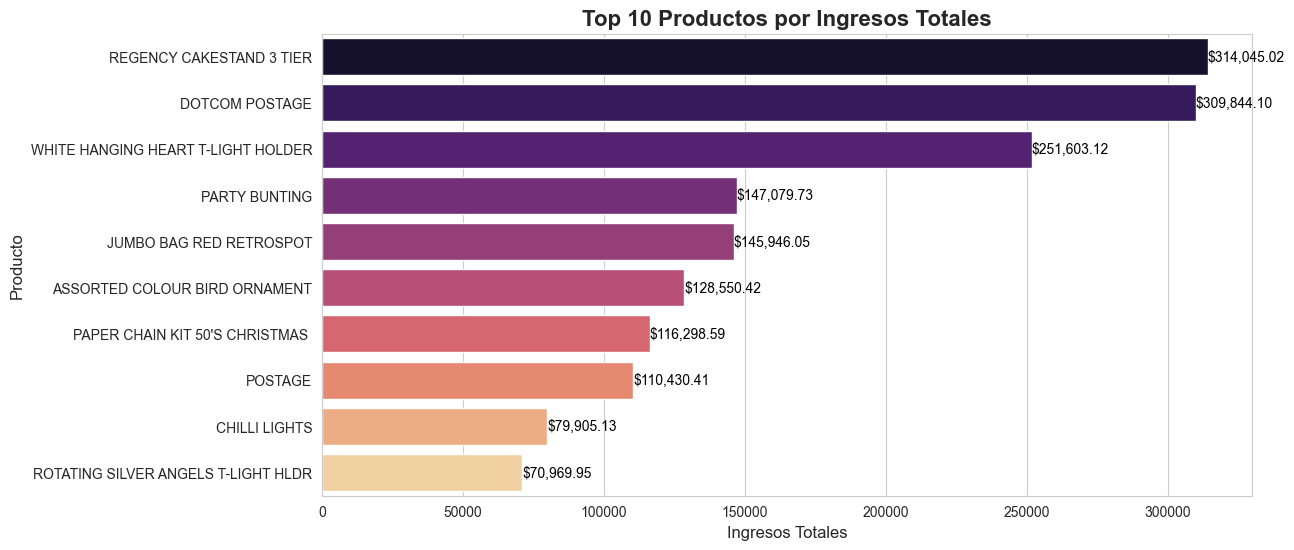

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna para el precio total
datos_combinados["TotalPrice"] = datos_combinados["Quantity"] * datos_combinados["Price"]

# Agrupar por producto y sumar el precio total
top_10_productos = datos_combinados.groupby("Description")["TotalPrice"].sum().reset_index()

# Ordenar de mayor a menor y seleccionar los 10 productos con mayores ventas totales
top_10_productos = top_10_productos.sort_values(by="TotalPrice", ascending=False).head(10)

# Configuración del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico de barras
sns.barplot(data=top_10_productos, y="Description", x="TotalPrice", palette="magma")

# Personalización del gráfico
plt.title("Top 10 Productos por Ingresos Totales", fontsize=16, fontweight="bold")
plt.xlabel("Ingresos Totales", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas de valores en cada barra
for index, value in enumerate(top_10_productos["TotalPrice"]):
    plt.text(value, index, f"${value:,.2f}", va="center", ha="left", fontsize=10, color="black")

# Mostrar el gráfico
plt.show()

In [27]:
# Crear una nueva columna para el precio total
datos_combinados["TotalPrice"] = datos_combinados["Quantity"] * datos_combinados["Price"]

# Agrupar por descripción y sumar el precio total
productos_mas_vendidos = datos_combinados.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False)

# Mostrar los 10 productos más vendidos
print(productos_mas_vendidos.head(10))

Description
REGENCY CAKESTAND 3 TIER               314045.02
DOTCOM POSTAGE                         309844.10
WHITE HANGING HEART T-LIGHT HOLDER     251603.12
PARTY BUNTING                          147079.73
JUMBO BAG RED RETROSPOT                145946.05
ASSORTED COLOUR BIRD ORNAMENT          128550.42
PAPER CHAIN KIT 50'S CHRISTMAS         116298.59
POSTAGE                                110430.41
CHILLI LIGHTS                           79905.13
ROTATING SILVER ANGELS T-LIGHT HLDR     70969.95
Name: TotalPrice, dtype: float64


In [28]:
# Homologar un nombre mal escrito
datos_combinados.loc[datos_combinados['Description'] == "PACK OF 72 RETRO SPOT CAKE CASES", 'Description'] = "PACK OF 72 RETROSPOT CAKE CASES"

C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\4281586557.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_productos, y="Description", x="Quantity", palette="magma")


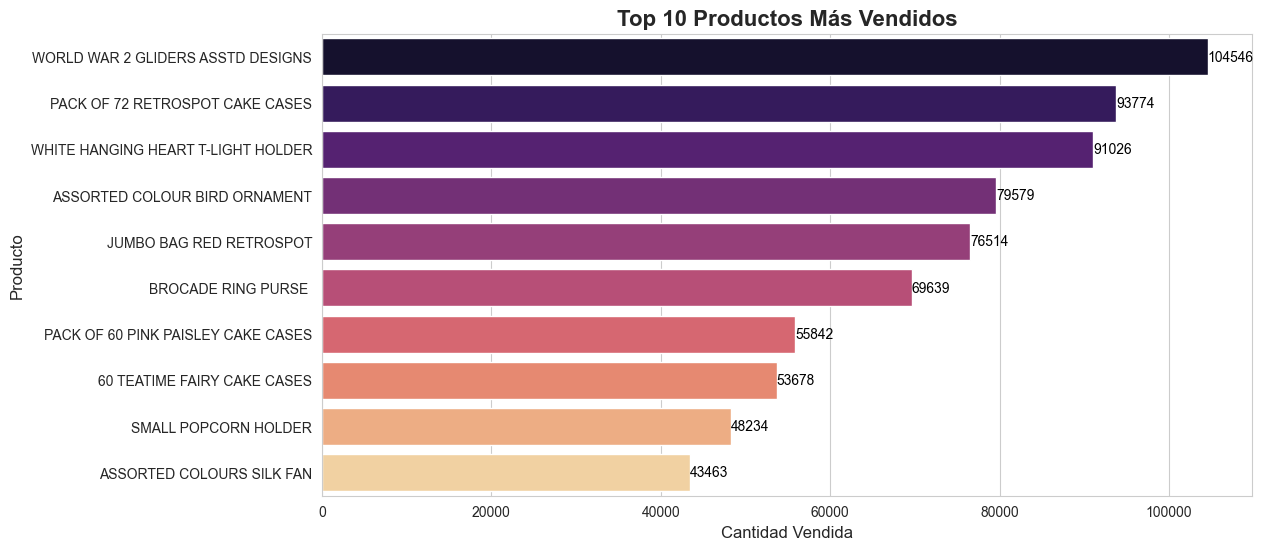

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por producto y sumar la cantidad vendida
top_10_productos = datos_combinados.groupby("Description")["Quantity"].sum().reset_index()

# Ordenar de mayor a menor y seleccionar los 10 más vendidos
top_10_productos = top_10_productos.sort_values(by="Quantity", ascending=False).head(10)

# Configuración del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico de barras
sns.barplot(data=top_10_productos, y="Description", x="Quantity", palette="magma")

# Personalización del gráfico
plt.title("Top 10 Productos Más Vendidos", fontsize=16, fontweight="bold")
plt.xlabel("Cantidad Vendida", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas de valores en cada barra
for index, value in enumerate(top_10_productos["Quantity"]):
    plt.text(value, index, f"{value}", va="center", ha="left", fontsize=10, color="black")

# Mostrar el gráfico
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\1650525091.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_productos = ventas_por_producto.groupby('Year').apply(lambda x: x.nlargest(5, 'Quantity')).reset_index(drop=True)


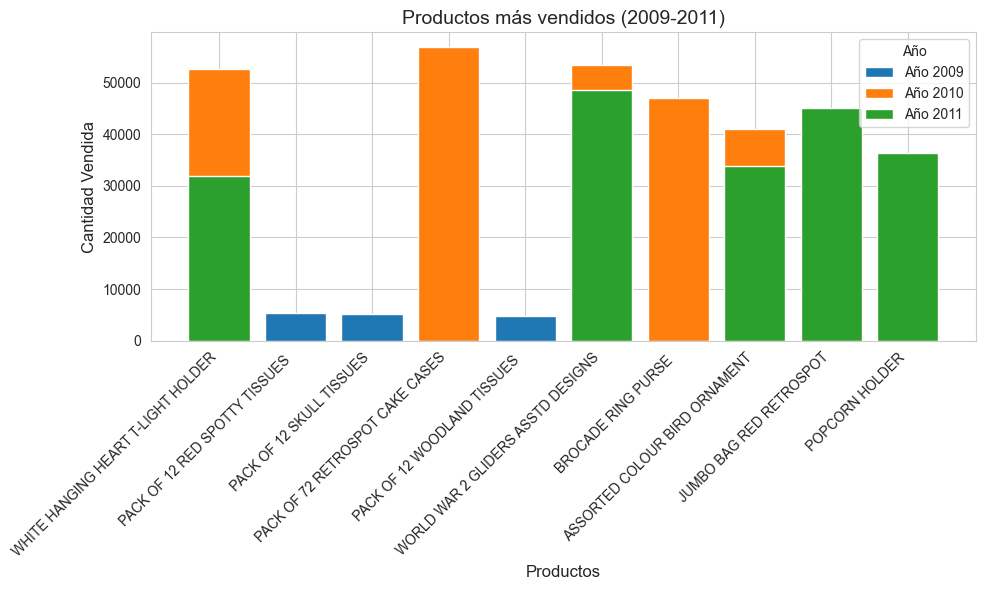

Top 5 países:
Country
United Kingdom    8587949
Netherlands        381853
EIRE               327431
Denmark            234764
Germany            221816
Name: Quantity, dtype: int64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos por años (2009, 2010, 2011) si aplica
# Asegúrate de convertir `InvoiceDate` en formato datetime si aún no lo está.
datos_combinados['InvoiceDate'] = pd.to_datetime(datos_combinados['InvoiceDate'])
datos_combinados['Year'] = datos_combinados['InvoiceDate'].dt.year

# Filtrar los años que nos interesan
datos_filtrados = datos_combinados[datos_combinados['Year'].isin([2009, 2010, 2011])]

# Agrupar por Producto (Description) y Año, sumando cantidades
ventas_por_producto = datos_filtrados.groupby(['Year', 'Description'])['Quantity'].sum().reset_index()

# Seleccionar los productos más vendidos para cada año
top_productos = ventas_por_producto.groupby('Year').apply(lambda x: x.nlargest(5, 'Quantity')).reset_index(drop=True)

# Graficar los productos más vendidos por año
fig, ax = plt.subplots(figsize=(10, 6))
for year in top_productos['Year'].unique():
    datos_a_graficar = top_productos[top_productos['Year'] == year]
    ax.bar(datos_a_graficar['Description'], datos_a_graficar['Quantity'], label=f"Año {year}")

ax.set_title("Productos más vendidos (2009-2011)", fontsize=14)
ax.set_xlabel("Productos", fontsize=12)
ax.set_ylabel("Cantidad Vendida", fontsize=12)
ax.legend(title="Año")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Obtener los 5 países principales
top_paises = datos_filtrados.groupby('Country')['Quantity'].sum().nlargest(5)
print("Top 5 países:")
print(top_paises)

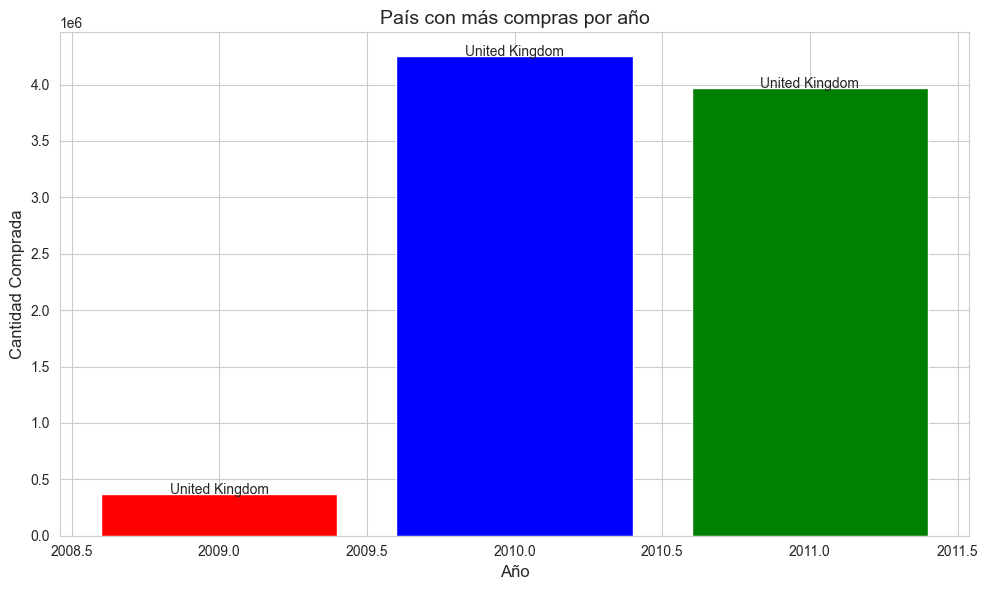

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que `InvoiceDate` esté en formato datetime
datos_combinados['InvoiceDate'] = pd.to_datetime(datos_combinados['InvoiceDate'])
datos_combinados['Year'] = datos_combinados['InvoiceDate'].dt.year

# Agrupar por Año y País, sumando la cantidad comprada
ventas_por_pais = datos_combinados.groupby(['Year', 'Country'])['Quantity'].sum().reset_index()

# Seleccionar el país con más compras para cada año
top_pais_por_ano = ventas_por_pais.loc[ventas_por_pais.groupby('Year')['Quantity'].idxmax()]

# Verificar si `top_pais_por_ano` es una Series antes de convertirlo a DataFrame
if isinstance(top_pais_por_ano, pd.Series):
    top_pais_por_ano = top_pais_por_ano.to_frame().reset_index()
else:
    top_pais_por_ano = top_pais_por_ano.reset_index()

# Asignar colores diferentes para cada año
colores = {2009: 'red', 2010: 'blue', 2011: 'green'}

# Graficar los resultados
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(top_pais_por_ano)):
    ax.bar(
        top_pais_por_ano['Year'].iloc[i],
        top_pais_por_ano['Quantity'].iloc[i],
        color=colores[top_pais_por_ano['Year'].iloc[i]]
    )

# Añadir etiquetas
for i in range(len(top_pais_por_ano)):
    ax.text(
        top_pais_por_ano['Year'].iloc[i],
        top_pais_por_ano['Quantity'].iloc[i] + 50,
        top_pais_por_ano['Country'].iloc[i],
        ha='center',
        fontsize=10
    )

# Configurar el gráfico
ax.set_title("País con más compras por año", fontsize=14)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Cantidad Comprada", fontsize=12)
plt.tight_layout()
plt.show()

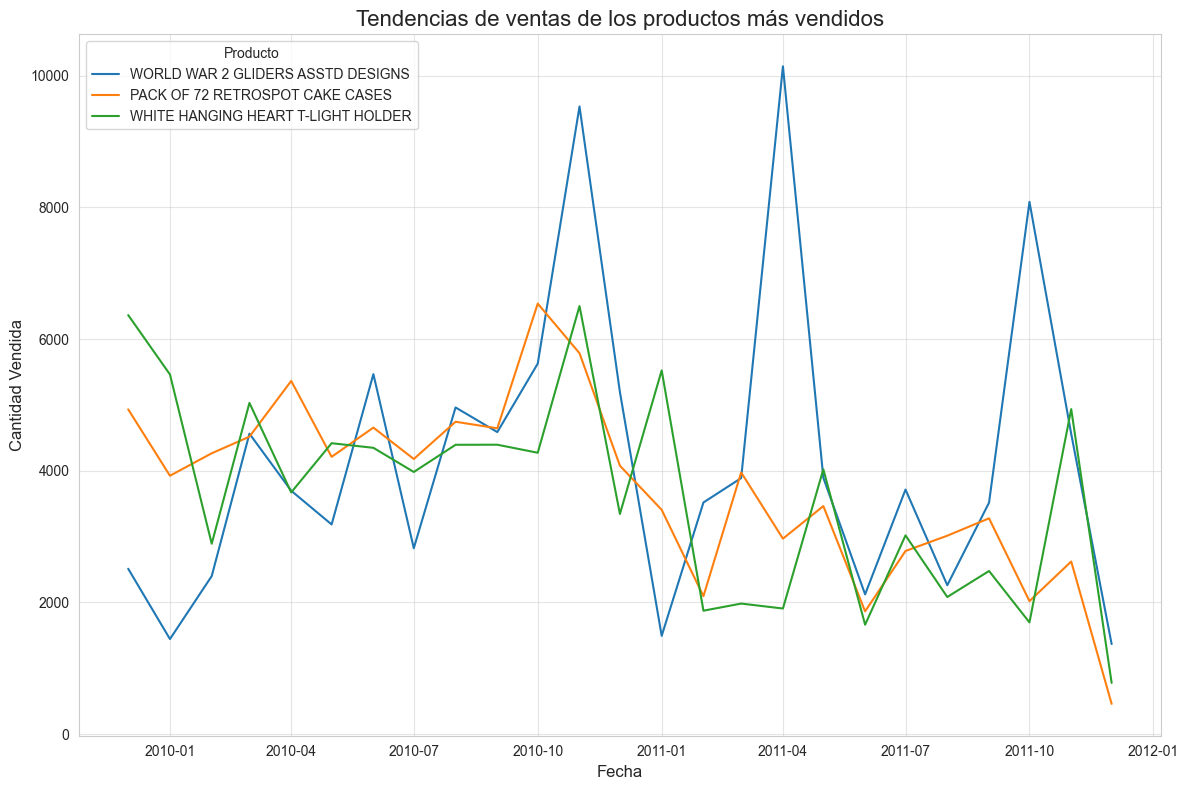

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que `InvoiceDate` esté en formato datetime
datos_combinados['InvoiceDate'] = pd.to_datetime(datos_combinados['InvoiceDate'])

# Agrupar datos por producto y fecha para calcular las cantidades vendidas
ventas_por_producto_fecha = datos_combinados.groupby(['Description', datos_combinados['InvoiceDate'].dt.to_period('M')])['Quantity'].sum().reset_index()
ventas_por_producto_fecha['InvoiceDate'] = ventas_por_producto_fecha['InvoiceDate'].dt.to_timestamp()

# Seleccionar los 5 productos más vendidos en total
top_productos = datos_combinados.groupby('Description')['Quantity'].sum().nlargest(3).index

# Filtrar datos para los productos más vendidos
datos_top_productos = ventas_por_producto_fecha[ventas_por_producto_fecha['Description'].isin(top_productos)]

# Crear el gráfico
plt.figure(figsize=(12, 8))
for producto in top_productos:
    datos_producto = datos_top_productos[datos_top_productos['Description'] == producto]
    plt.plot(datos_producto['InvoiceDate'], datos_producto['Quantity'], label=producto)

# Configurar el gráfico
plt.title("Tendencias de ventas de los productos más vendidos", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.legend(title="Producto", loc="upper left", fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\1372886022.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados['Año'] = datos_filtrados['InvoiceDate'].dt.year
C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\1372886022.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados['Mes'] = datos_filtrados['InvoiceDate'].dt.month


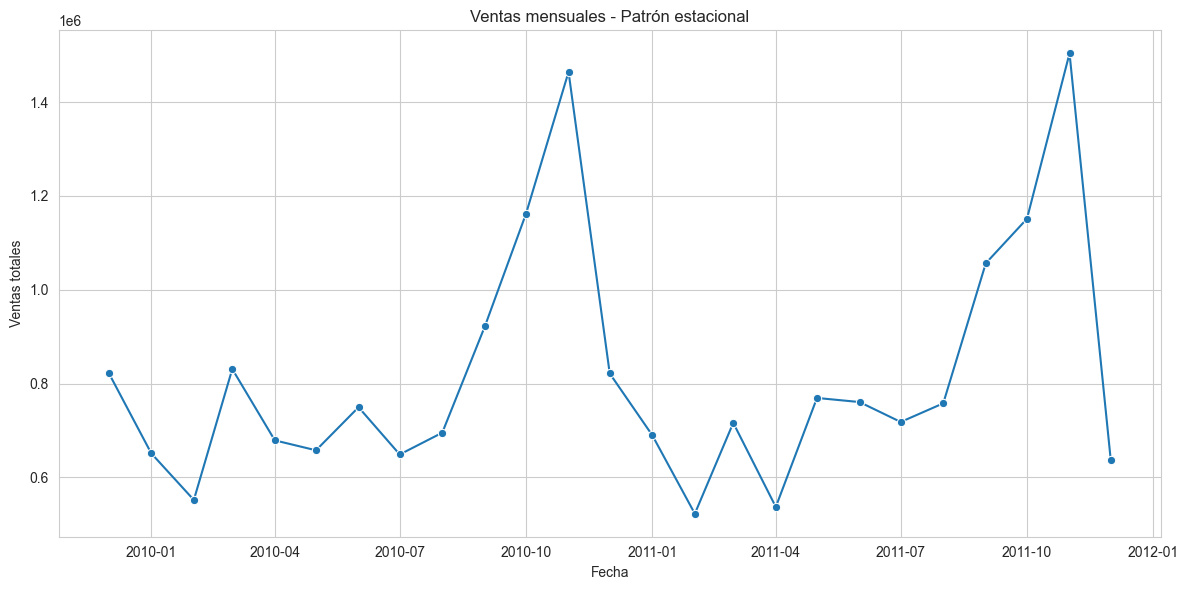

📈 El mes con más ventas en total (sumando todos los años) es: 11


C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\1372886022.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_mes, x='Mes', y='Ventas', palette='viridis')


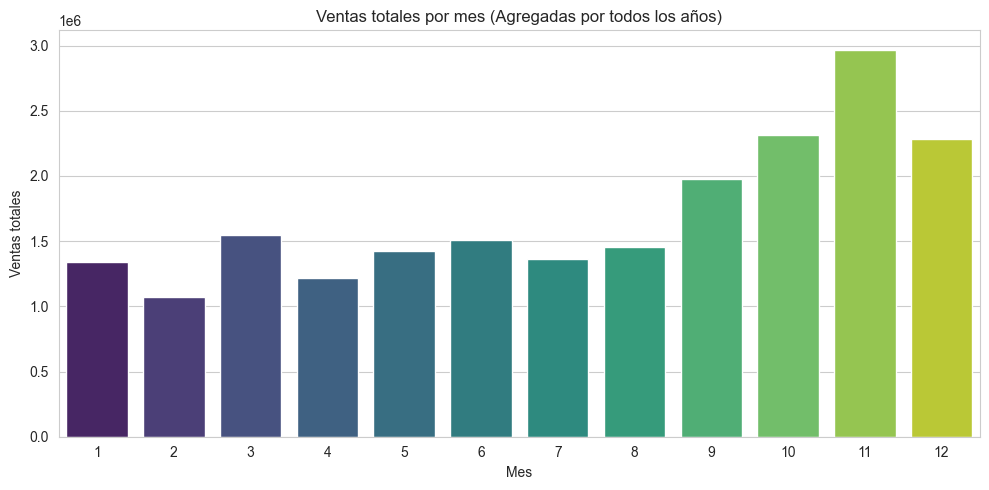

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que InvoiceDate sea tipo datetime
datos_combinados['InvoiceDate'] = pd.to_datetime(datos_combinados['InvoiceDate'])

# Crea la columna de ventas
datos_combinados['Ventas'] = datos_combinados['Quantity'] * datos_combinados['Price']

# Filtra solo las ventas positivas
datos_filtrados = datos_combinados[datos_combinados['Ventas'] > 0]

# Extrae año y mes
datos_filtrados['Año'] = datos_filtrados['InvoiceDate'].dt.year
datos_filtrados['Mes'] = datos_filtrados['InvoiceDate'].dt.month

# Agrupa ventas por año y mes
ventas_mensuales = datos_filtrados.groupby(['Año', 'Mes'])['Ventas'].sum().reset_index()

# Corrige la creación de la columna Fecha
ventas_mensuales['Fecha'] = pd.to_datetime(
    ventas_mensuales.rename(columns={'Año': 'year', 'Mes': 'month'})[['year', 'month']].assign(day=1)
)

# Visualiza la evolución mensual de ventas
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='Fecha', y='Ventas', marker='o')
plt.title('Ventas mensuales - Patrón estacional')
plt.xlabel('Fecha')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Agrupa por mes para identificar estacionalidad agregada (sin distinguir años)
ventas_por_mes = datos_filtrados.groupby('Mes')['Ventas'].sum().reset_index()

# Encuentra el mes con mayores ventas
mes_maximo = ventas_por_mes.loc[ventas_por_mes['Ventas'].idxmax(), 'Mes']
print(f"📈 El mes con más ventas en total (sumando todos los años) es: {mes_maximo}")

# Visualiza ventas totales por mes
plt.figure(figsize=(10, 5))
sns.barplot(data=ventas_por_mes, x='Mes', y='Ventas', palette='viridis')
plt.title('Ventas totales por mes (Agregadas por todos los años)')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.tight_layout()
plt.show()


Clientes en gráfico: ['Unknown Customer - United Kingdom', '18102.0 - United Kingdom', '14646.0 - Netherlands', '14156.0 - EIRE', '14911.0 - EIRE']


C:\Users\Asus\AppData\Local\Temp\ipykernel_12232\3934513211.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Etiqueta', y='Ventas', data=top_5, palette='viridis')


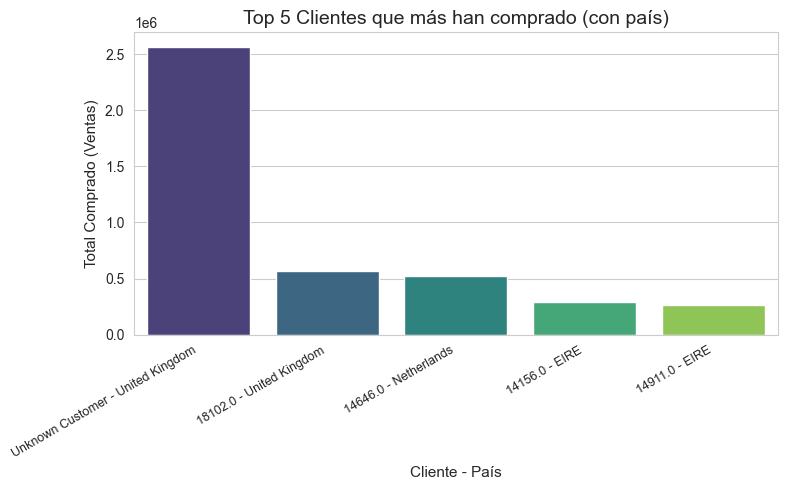

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que estamos trabajando con una copia limpia
df = datos_combinados.copy()

# Calcular ventas totales por cliente
top_clientes = df.groupby('Customer ID')['Ventas'].sum().reset_index()

# Obtener top 5 clientes
top_5 = top_clientes.sort_values(by='Ventas', ascending=False).head(5)

# Obtener país de cada cliente (el primero disponible para cada ID)
clientes_con_pais = df[['Customer ID', 'Country']].drop_duplicates(subset='Customer ID')

# Unir con top 5
top_5 = top_5.merge(clientes_con_pais, on='Customer ID', how='left')

# Asegurar que solo sean 5 filas
top_5 = top_5.drop_duplicates(subset='Customer ID').head(5)

# Crear etiqueta combinada
top_5['Etiqueta'] = top_5['Customer ID'].astype(str) + ' - ' + top_5['Country']

# Verificar en consola
print("Clientes en gráfico:", top_5['Etiqueta'].tolist())

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x='Etiqueta', y='Ventas', data=top_5, palette='viridis')

plt.title('Top 5 Clientes que más han comprado (con país)', fontsize=14)
plt.xlabel('Cliente - País', fontsize=11)
plt.ylabel('Total Comprado (Ventas)', fontsize=11)
plt.xticks(rotation=30, ha='right', fontsize=9)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd

# Crear una copia del DataFrame original
df_limpio = datos_combinados.copy()

# Filtrar los clientes desconocidos de Reino Unido
df_limpio = df_limpio[~((df_limpio["Country"] == "United Kingdom") & (df_limpio["Customer ID"].isna()))]

print("Se ha creado un nuevo DataFrame sin clientes desconocidos de Reino Unido.")

Se ha creado un nuevo DataFrame sin clientes desconocidos de Reino Unido.


In [37]:
import pandas as pd

# Agrupar por "Customer ID" y sumar la columna "Ventas"
clientes_top = df_limpio[df_limpio["Country"] == "United Kingdom"].groupby("Customer ID")["Ventas"].sum()

# Ordenar en orden descendente para ver quién compró más
clientes_top = clientes_top.sort_values(ascending=False)

# Mostrar los clientes que más han comprado
print(clientes_top)

Customer ID
Unknown Customer    2503555.25
18102.0              570380.61
17450.0              231390.55
13694.0              190020.84
17511.0              168491.62
                       ...    
16151.0               -4217.59
16981.0               -4620.86
15849.0               -5876.34
12918.0              -10953.50
17399.0              -25111.09
Name: Ventas, Length: 5411, dtype: float64


In [38]:
import pandas as pd

# Filtrar clientes desconocidos
clientes_desconocidos = datos_combinados[
    datos_combinados["Customer ID"].isnull() | 
    (datos_combinados["Customer ID"] == "Unknown Customer")
]

# Contar cuántos clientes desconocidos hay en cada país
clientes_por_pais = clientes_desconocidos.groupby("Country").size().reset_index(name="Cantidad")

# Mostrar resultado
print(clientes_por_pais)

                 Country  Cantidad
0                Bahrain        67
1                Bermuda        34
2                   EIRE      1653
3                 France       128
4              Hong Kong       360
5                 Israel        47
6                Lebanon        13
7                Nigeria         2
8               Portugal       114
9                    RSA        46
10                Sweden        19
11           Switzerland       117
12  United Arab Emirates       114
13        United Kingdom    227931
14           Unspecified       231


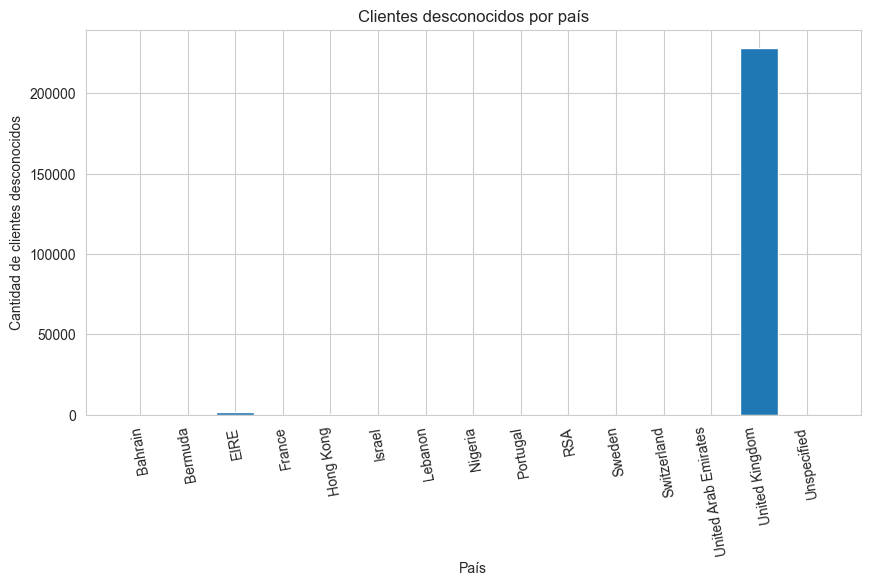

In [39]:
import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(10, 5))
plt.bar(clientes_por_pais["Country"], clientes_por_pais["Cantidad"])
plt.xticks(rotation=100)
plt.xlabel("País")
plt.ylabel("Cantidad de clientes desconocidos")
plt.title("Clientes desconocidos por país")
plt.show()

PARTE 1

In [40]:
print(datos_combinados.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  TotalPrice  Year  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom        83.4  2009   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.0  2009   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.0  2009   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom       100.8  2009   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom        30.0  2009   

   Ventas  
0    83.4  
1    81.0  
2    81.0  
3   100.8  
4    30.0  


In [41]:
import pandas as pd

# Asumiendo que df es tu DataFrame
# Primero agrupamos por cliente y calculamos métricas importantes
customer_stats = df.groupby('Customer ID').agg(
    TotalSpent=pd.NamedAgg(column='TotalPrice', aggfunc='sum'),
    PurchaseCount=pd.NamedAgg(column='Invoice', aggfunc='nunique'),
    TotalQuantity=pd.NamedAgg(column='Quantity', aggfunc='sum')
).reset_index()

# Definición de categorías (puedes ajustar estos umbrales)
# Ejemplo 1: Basado en el gasto total
median_spent = customer_stats['TotalSpent'].median()
customer_stats['CustomerCategory'] = ['Premium' if x > median_spent else 'Normal' for x in customer_stats['TotalSpent']]

# Ejemplo 2: Combinación de métricas (más sofisticado)
# Aquí definimos Premium como clientes que están en el top 25% en gasto Y frecuencia
q75_spent = customer_stats['TotalSpent'].quantile(0.75)
q75_freq = customer_stats['PurchaseCount'].quantile(0.75)

customer_stats['CustomerCategory'] = [
    'Premium' if (spent > q75_spent) and (freq > q75_freq) else 'Normal'
    for spent, freq in zip(customer_stats['TotalSpent'], customer_stats['PurchaseCount'])
]

# Unir esta clasificación con los datos originales
df = df.merge(customer_stats[['Customer ID', 'CustomerCategory']], on='Customer ID', how='left')

In [42]:
# Contar clientes únicos por categoría (evita duplicados si un cliente aparece varias veces)
customer_counts = df.drop_duplicates('Customer ID')['CustomerCategory'].value_counts()

print(customer_counts)

CustomerCategory
Normal     4813
Premium    1130
Name: count, dtype: int64


In [43]:
print(datos_combinados.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  TotalPrice  Year  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom        83.4  2009   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.0  2009   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.0  2009   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom       100.8  2009   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom        30.0  2009   

   Ventas  
0    83.4  
1    81.0  
2    81.0  
3   100.8  
4    30.0  


Parte 2

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Asegúrate de tener la columna CustomerCategory en tu DataFrame
# Si no existe, la copiamos desde el DataFrame `df`
if "CustomerCategory" not in datos_combinados.columns:
    # Reduce the size of `df` before merging to avoid memory issues
    df_reduced = df[["Customer ID", "CustomerCategory"]].drop_duplicates()
    datos_combinados = datos_combinados.merge(df_reduced, on="Customer ID", how="left")

# Vamos a codificar la variable objetivo
datos_combinados["CustomerCategory"] = datos_combinados["CustomerCategory"].map({
    "Normal": 0,
    "Premium": 1
})

# Reducir el tamaño del conjunto de datos si es necesario
# Por ejemplo, seleccionando una muestra aleatoria de 100,000 filas
if len(datos_combinados) > 100000:
    datos_combinados = datos_combinados.sample(n=100000, random_state=42)

# Optimizar los tipos de datos para ahorrar memoria
datos_combinados["TotalPrice"] = datos_combinados["TotalPrice"].astype("float32")
datos_combinados["Quantity"] = datos_combinados["Quantity"].astype("int32")
datos_combinados["Price"] = datos_combinados["Price"].astype("float32")
datos_combinados["CustomerCategory"] = datos_combinados["CustomerCategory"].astype("int8")

# Variables predictoras (puedes ajustar según tu análisis)
X = datos_combinados[["TotalPrice", "Quantity", "Price"]]
y = datos_combinados["CustomerCategory"]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# Predicciones
y_pred = modelo.predict(X_test)

# Métricas de desempeño
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Matriz de Confusión:
 [[  242  5530]
 [  298 13930]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.45      0.04      0.08      5772
           1       0.72      0.98      0.83     14228

    accuracy                           0.71     20000
   macro avg       0.58      0.51      0.45     20000
weighted avg       0.64      0.71      0.61     20000



✅ Accuracy: 71% (aparentemente aceptable)
⚠️ Problema grave: El modelo ignora casi por completo la Clase 0 (solo detecta el 4% de estos casos)

In [50]:
print(datos_combinados.head())

       Invoice StockCode                          Description  Quantity  \
551330  541244     22117     METAL SIGN HER DINNER IS SERVED          1   
871191  569897     82552                  WASHROOM METAL SIGN         1   
21617   491118    90214O            LETTER "O" BLING KEY RING         2   
941979  575491    85071A  BLUE CHARLIE+LOLA PERSONAL DOORSIGN         2   
852699  568553     23420            PANTRY HOOK TEA STRAINER         12   

               InvoiceDate  Price Customer ID         Country  TotalPrice  \
551330 2011-01-16 12:35:00   2.95     15535.0  United Kingdom    2.950000   
871191 2011-10-06 16:01:00   1.45     17813.0  United Kingdom    1.450000   
21617  2009-12-09 15:03:00   1.25     16933.0  United Kingdom    2.500000   
941979 2011-11-09 17:47:00   0.39     15531.0  United Kingdom    0.780000   
852699 2011-09-27 15:17:00   2.08     15674.0  United Kingdom   24.959999   

        Year  Ventas  CustomerCategory  
551330  2011    2.95                 0  
8711

PARTE 2

In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar características relevantes para la segmentación
features = datos_combinados[['Quantity', 'Price', 'TotalPrice', 'CustomerCategory']]

# Escalar los datos (K-means es sensible a las escalas)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

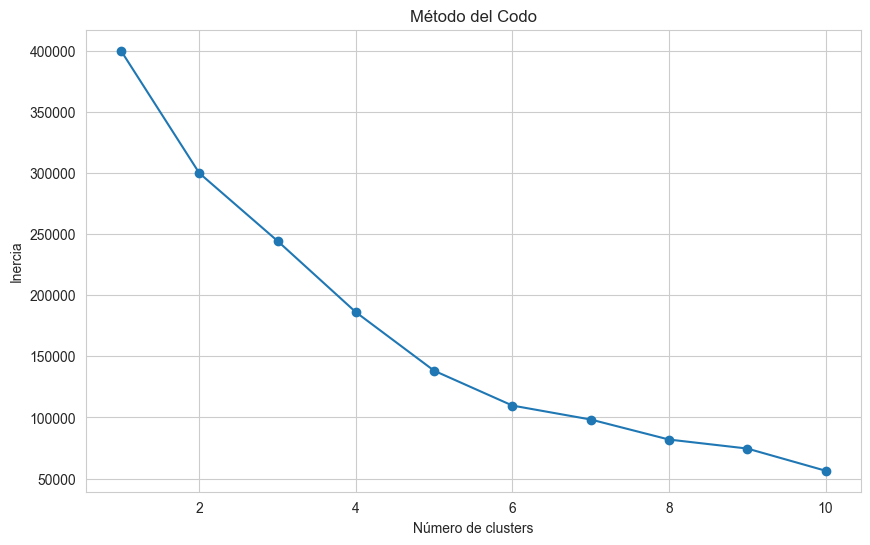

In [52]:
# Método del codo para encontrar el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

In [53]:
# Suponiendo que elegimos 4 clusters basados en el método del codo
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# Añadir los clusters al dataframe original
#
datos_combinados['Cluster'] = clusters

  Cluster   Quantity               Price                TotalPrice  \
                mean median         mean       median         mean   
0       0  10.399514    3.0     4.344304     2.100000    20.160381   
1       1   9.598890    4.0     3.421683     1.950000    14.533500   
2       2  -1.250000   -1.0  5803.502441  4189.325195 -6843.767578   
3       3   1.000000    1.0  8955.834961  8955.834961  8955.834961   

                      CustomerCategory  
        median  count         <lambda>  
0     9.900000  71174                1  
1    10.200000  28820                0  
2 -6269.854980      4                0  
3  8955.834961      2                0  


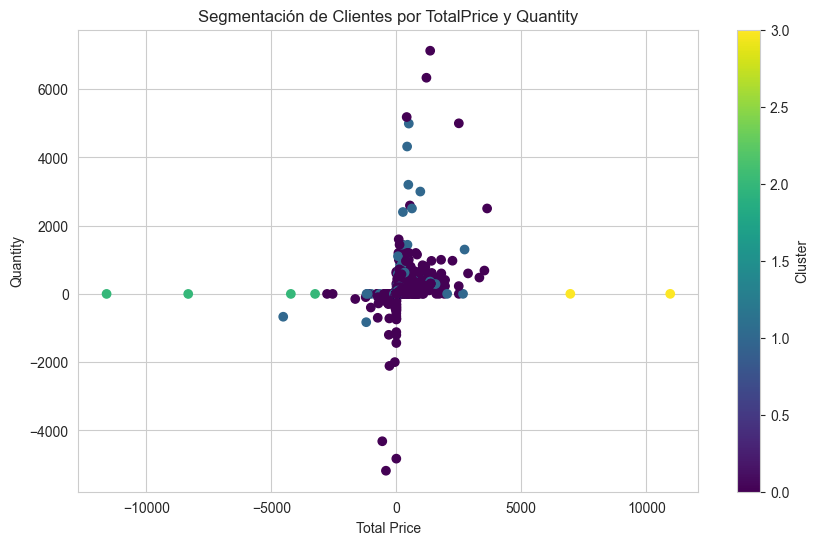

In [54]:
# Estadísticas por cluster
cluster_stats = datos_combinados.groupby('Cluster').agg({
    'Quantity': ['mean', 'median'],
    'Price': ['mean', 'median'],
    'TotalPrice': ['mean', 'median', 'count'],
    'CustomerCategory': lambda x: x.mode()[0]
}).reset_index()

print(cluster_stats)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(datos_combinados['TotalPrice'], datos_combinados['Quantity'], 
            c=datos_combinados['Cluster'], cmap='viridis')
plt.title('Segmentación de Clientes por TotalPrice y Quantity')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.colorbar(label='Cluster')
plt.show()

Los clusters principales son el 0 y el 1, que representan a la mayoría de los clientes con patrones de compra similares pero con diferencias leves en precios y cantidades.
Los clusters 2 y 3 contienen outliers o datos atípicos que podrían investigarse más a fondo para verificar su validez o tratarlos como casos especiales

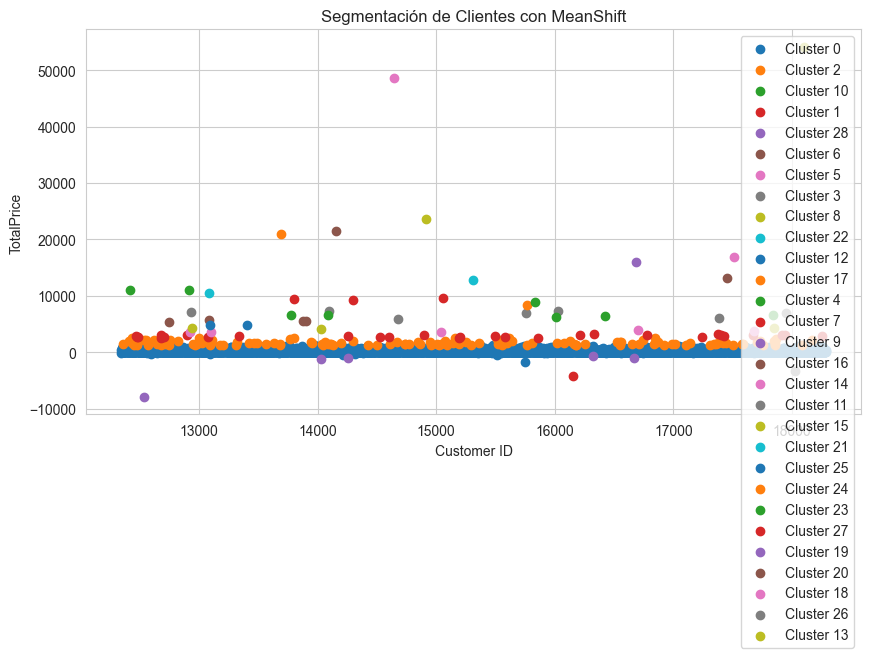

          count          mean         std           min           25%  \
Cluster                                                                 
0        5058.0    170.826096  213.775986   -466.450012     34.912501   
1          29.0   2857.300049  188.858154   2570.030029   2700.540039   
2         124.0   1634.283813  357.589386   1210.359985   1365.572449   
3           5.0   7153.089844  157.969879   6958.169922   7030.279785   
4           5.0   6534.549805  135.215698   6323.200195   6493.350098   
5           5.0   3682.996094  140.931381   3552.979980   3579.820068   
6           4.0   5516.972656  117.479301   5405.569824   5448.807617   
7           3.0   9466.339844  163.745819   9330.650391   9375.400391   
8           3.0   4210.506348  133.824753   4058.870117   4159.715088   
9           4.0   -962.392456  242.099335  -1203.500000  -1065.289978   
10          2.0  10981.845703   40.086189  10953.500000  10967.672607   
11          2.0   5979.544922   38.247295   5952.50

In [55]:
from sklearn.cluster import MeanShift

import matplotlib.pyplot as plt

# Agrupar por cliente y sumar el total gastado
clientes = datos_combinados.groupby("Customer ID")["TotalPrice"].sum().reset_index()
clientes = clientes[clientes["Customer ID"] != "Unknown Customer"]  # Excluir desconocidos si es necesario

# Reshape para MeanShift (solo TotalPrice)
X = clientes[["TotalPrice"]].values

# Aplicar MeanShift
meanshift = MeanShift()
clientes['Cluster'] = meanshift.fit_predict(X)

# Visualizar los clusters
plt.figure(figsize=(10, 5))
for cluster in clientes['Cluster'].unique():
    subset = clientes[clientes['Cluster'] == cluster]
    plt.scatter(subset['Customer ID'], subset['TotalPrice'], label=f'Cluster {cluster}')
plt.xlabel('Customer ID')
plt.ylabel('TotalPrice')
plt.title('Segmentación de Clientes con MeanShift')
plt.legend()
plt.show()

# Mostrar resumen de cada cluster
print(clientes.groupby('Cluster')['TotalPrice'].describe())

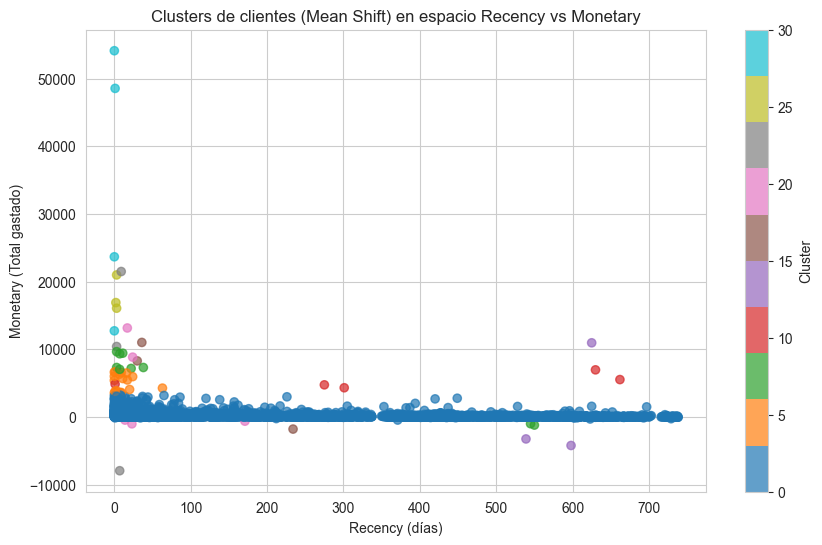

            Recency          Frequency             Monetary                \
               mean median        mean median          mean        median   
Cluster                                                                     
0        214.639558  125.0    4.131465    2.0    172.819611     89.889999   
1         58.035714    8.5   34.178571   28.5   2867.559814   2875.189941   
2         65.732759   16.0   20.758621   20.0   1674.327026   1552.915039   
3         14.857143    8.0   38.714286   33.0   3819.201416   3793.379883   
4         10.400000   11.0   69.800000   33.0   5701.275879   5678.500000   
5          6.600000    7.0   66.800000   35.0   6534.549805   6568.879883   
6         17.500000   14.5   24.250000   22.0   7201.819824   7235.580078   
7          7.000000    7.0   54.666667   55.0   9466.339844   9420.150391   
8        547.500000  547.5    1.000000    1.0  -1102.064941  -1102.064941   
9        192.333333  275.0   67.666667   50.0   4635.666504   4741.839844   

In [58]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Selecciona solo las columnas RFM para clustering
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']].values

# Aplica Mean Shift
meanshift = MeanShift()
rfm['Cluster'] = meanshift.fit_predict(rfm_features)

# Visualiza los clusters en el espacio RFM (usando solo dos dimensiones para graficar)
plt.figure(figsize=(10, 6))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('Recency (días)')
plt.ylabel('Monetary (Total gastado)')
plt.title('Clusters de clientes (Mean Shift) en espacio Recency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()

# Estadísticas por cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
})
print(cluster_summary)


Comparacion entre las dos   

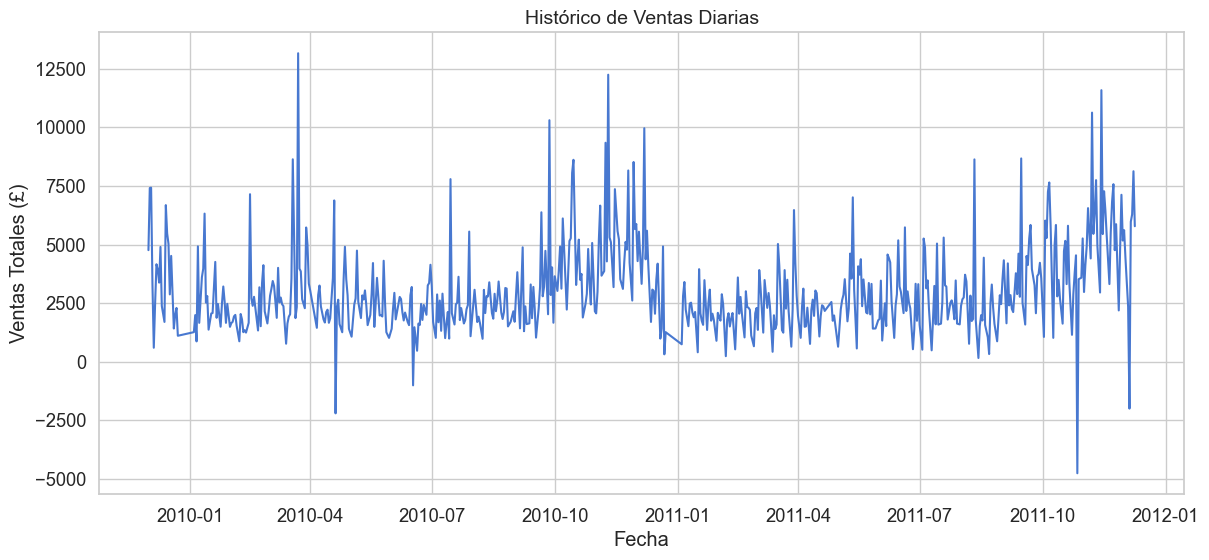

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crear características temporales
datos_combinados['InvoiceDate'] = pd.to_datetime(datos_combinados['InvoiceDate'])
datos_combinados['Mes'] = datos_combinados['InvoiceDate'].dt.month
datos_combinados['DiaSemana'] = datos_combinados['InvoiceDate'].dt.dayofweek
datos_combinados['Trimestre'] = datos_combinados['InvoiceDate'].dt.quarter

# Crear variable objetivo (ventas totales por día)
ventas_diarias = datos_combinados.groupby(datos_combinados['InvoiceDate'].dt.date).agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'Mes': 'first',
    'DiaSemana': 'first',
    'Trimestre': 'first'
}).reset_index()

# Visualización de ventas históricas
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_diarias, x='InvoiceDate', y='TotalPrice')
plt.title('Histórico de Ventas Diarias', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (£)')
plt.grid(True)
plt.show()

In [ ]:
# Dividir en características (X) y objetivo (y)
X = ventas_diarias[['Mes', 'DiaSemana', 'Trimestre']]
y = ventas_diarias['TotalPrice']

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo (Random Forest)
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

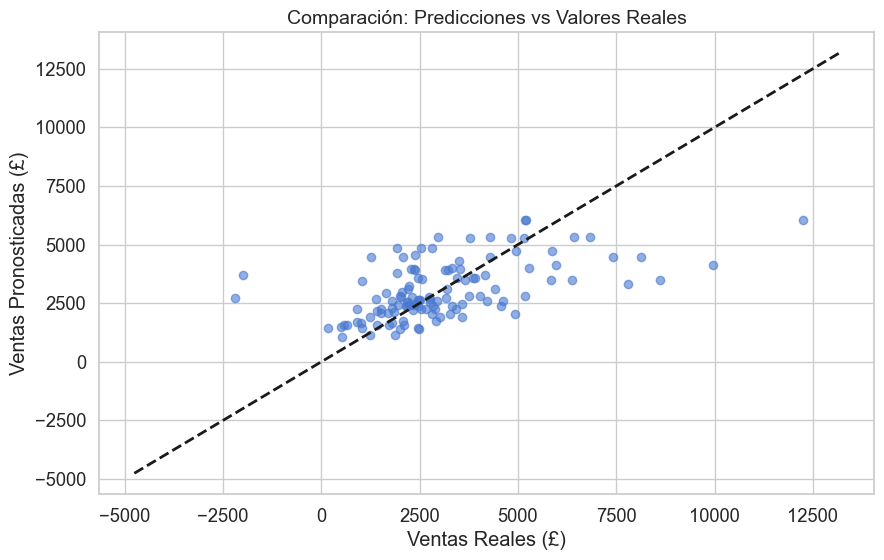

C:\Users\Asus\AppData\Local\Temp\ipykernel_47076\3301930287.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=features, palette='viridis')


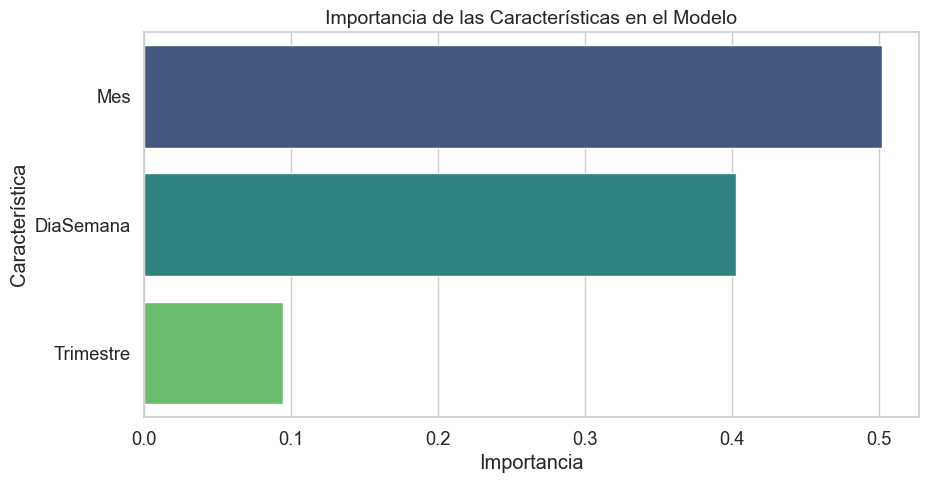

In [ ]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Ventas Reales (£)')
plt.ylabel('Ventas Pronosticadas (£)')
plt.title('Comparación: Predicciones vs Valores Reales', fontsize=14)
plt.grid(True)
plt.show()

# Gráfico de importancia de características
importancias = modelo.feature_importances_
features = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importancias, y=features, palette='viridis')
plt.title('Importancia de las Características en el Modelo', fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_47076\3780024425.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dias_semana, y=ventas_predichas, palette='Blues_d')


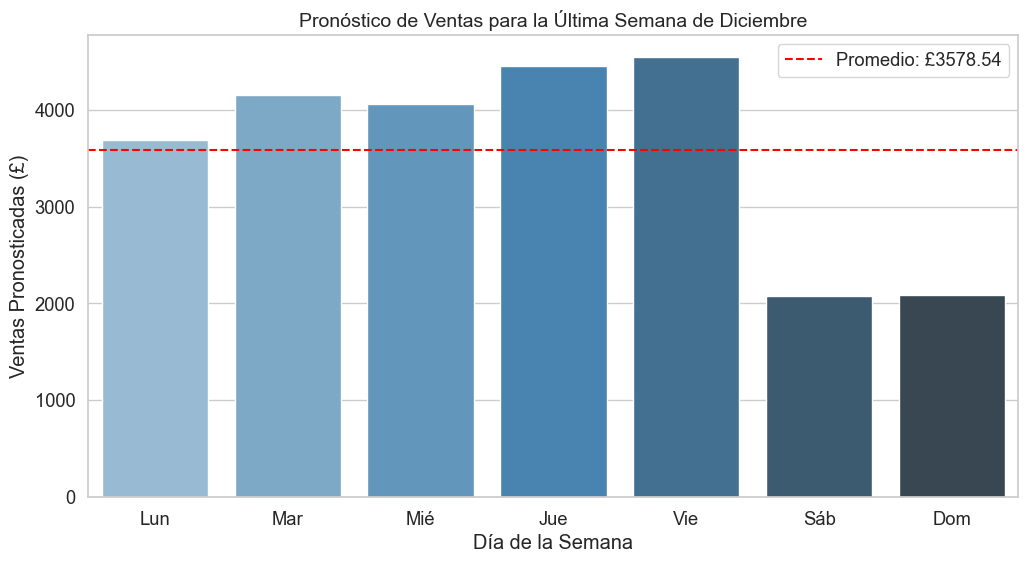


Pronóstico de ventas promedio: £3578.54 por día
Día de máxima venta: Vie (£4540.87)


In [ ]:
# Crear datos para predicción (próximo mes)
proximo_mes = pd.DataFrame({
    'Mes': [12, 12, 12, 12, 12, 12, 12],  # Diciembre
    'DiaSemana': [0, 1, 2, 3, 4, 5, 6],    # Lunes a Domingo
    'Trimestre': [4, 4, 4, 4, 4, 4, 4]      # 4to trimestre
})

# Predecir ventas
ventas_predichas = modelo.predict(proximo_mes)

# Visualizar predicción
dias_semana = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
plt.figure(figsize=(12, 6))
sns.barplot(x=dias_semana, y=ventas_predichas, palette='Blues_d')
plt.title('Pronóstico de Ventas para la Última Semana de Diciembre', fontsize=14)
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Pronosticadas (£)')
plt.axhline(y=ventas_predichas.mean(), color='red', linestyle='--', 
            label=f'Promedio: £{ventas_predichas.mean():.2f}')
plt.legend()
plt.show()

print(f"\nPronóstico de ventas promedio: £{ventas_predichas.mean():.2f} por día")
print(f"Día de máxima venta: {dias_semana[np.argmax(ventas_predichas)]} (£{ventas_predichas.max():.2f})")


Resultados del Modelo:
Error Absoluto Medio (MAE): £1188.30
Coeficiente R²: 30.06%


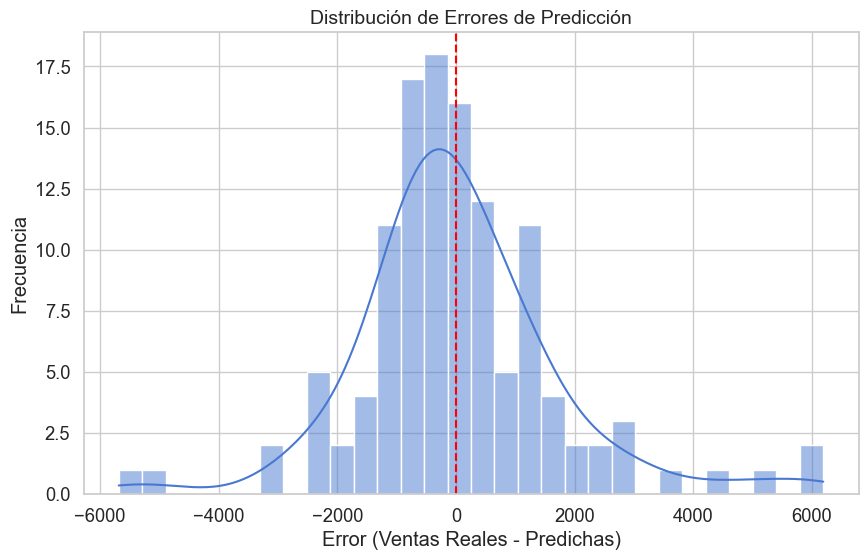

In [ ]:
# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del Modelo:")
print(f"Error Absoluto Medio (MAE): £{mae:.2f}")
print(f"Coeficiente R²: {r2:.2%}")

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.title('Distribución de Errores de Predicción', fontsize=14)
plt.xlabel('Error (Ventas Reales - Predichas)')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

Conclusión: 
-El modelo hace predicciones, pero los errores promedio son grandes (según el MAE).


-La capacidad del modelo para explicar la variabilidad en los datos es limitada (según el ( R^2 )).
